In [1]:
import numpy as np 
import pandas as pd

In [21]:
energy = pd.read_csv('./data/Building_59/Bldg59_clean data/ele.csv')
energy['datetime'] = pd.to_datetime(energy['date'])
energy['date'] = energy['datetime'].dt.date
energy['total_energy'] = energy['mels_S']+energy['lig_S']+energy['mels_N']+energy['hvac_N']+energy['hvac_S']
energy = energy[['date','total_energy']]
energy = energy.groupby('date').sum()
energy.head()

,total_energy
date,
2018-01-01,6287.680033
2018-01-02,8042.225018
2018-01-03,7890.810021
2018-01-04,8114.895017
2018-01-05,7711.140000


In [22]:
energy.to_csv('daily_energy_consumption.csv')

<AxesSubplot:xlabel='date'>

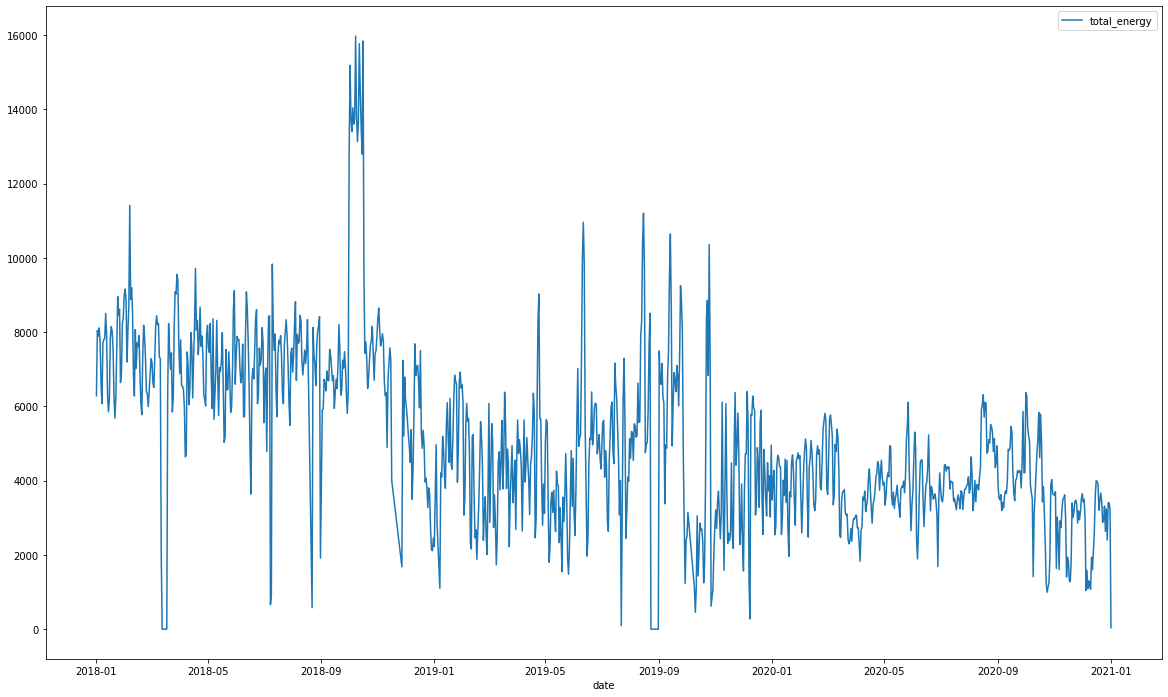

In [26]:
import matplotlib.pyplot as plt 

energy.plot(figsize=(20,12))

<AxesSubplot:ylabel='Count'>

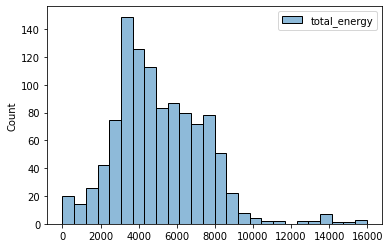

In [27]:
import seaborn as sns 
sns.histplot(data=energy)

In [20]:
weather = pd.read_csv('data/Building_59/Bldg59_clean data/site_weather.csv')
weather['temperature'] = (weather['air_temp_set_1'] + weather['air_temp_set_2']) / 2
weather = weather.rename(columns={'relative_humidity_set_1':'humidity', 'solar_radiation_set_1':'sunnyness'})
weather = weather[['date','temperature','humidity','sunnyness']]
weather.head()

,date,temperature,humidity,sunnyness
0,2018-01-01 00:00:00,11.575,79.07,86.70
1,2018-01-01 00:15:00,11.455,80.10,45.88
2,2018-01-01 00:30:00,11.550,79.92,51.62
3,2018-01-01 00:45:00,11.425,80.20,21.43
4,2018-01-01 01:00:00,11.135,81.50,6.45
